# Ensemble Method: Decision Trees, Random Forests, Extremly Random Forests and Gradient Boosting Trees.

## Decision Trees


Decision Trees (DTs) are the supervised learning machine learning approach which can be used in classification and regression. The [Decision Trees](https://scikit-learn.org/stable/modules/tree.html) are the basis of the [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Here the dataset we use is the [iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset from [sklearn](https://scikit-learn.org/stable/) library. Make sure to install the [graphviz](https://pypi.org/project/graphviz/) in your operating system.

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree 
import pandas as pd
import numpy as np
import graphviz

In [2]:
iris = load_iris()

In [ ]:
from IPython import display
from sklearn import datasets, tree, utils
import graphviz 
import numpy as np


iris = datasets.load_iris()


In [29]:
print("The features of flowers are:\n",iris.feature_names)

The features of flowers are:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


If we export the iris dataset into dataframe format would be better since the data interpretation is easier. So let's do it:

In [4]:
df_data = pd.DataFrame(iris.data)
df_data = df_data.rename(columns={0:'sepal length (cm)', 1:'sepal width (cm)', 2:'petal length (cm)', 3:'petal width (cm)'})
df_target = pd.DataFrame(iris.target)
df_target = df_target.rename(columns={0:"target"})

df_target['target_name'] = 0 # create a target_name column

In [5]:
# rename the target_name values based on the target values column

for i in range(len(df_target)):
    if (df_target['target'][i] == 0):
        df_target.loc[i,'target_name'] = 'setosa'
    elif(df_target['target'][i] == 1):
        df_target.loc[i,'target_name'] = 'versicolor'
    elif(df_target['target'][i] == 2):
        df_target.loc[i,'target_name'] = 'virginica'

In [7]:
# concatenate the data frames: df_data and df_target
data = pd.concat([df_data, df_target],axis=1)
data.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa


The data has multiple columns which the features are:
* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)

The dependent value is *target* column.

In [35]:
x = data[['petal length (cm)','petal width (cm)']].values
y = data[['target']].values

In [36]:
tree_clf = tree.DecisionTreeClassifier(max_depth=2).fit(x, y)

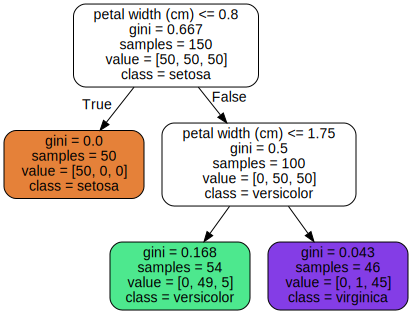

In [37]:
# Generate a plot of the decision tree
graphviz.Source(
    tree.export_graphviz(
        tree_clf,
        class_names=iris.target_names,
        feature_names=iris.feature_names[2:],
        filled=True, 
        rounded=True)
)

### Talking about the fit resutls

Let's start from the top box where the depth is zero. In this box it is asking whether the petal width is smaller than 0.8 (cm). If it is smaller then we move to the left side of the graph which is a *leaf*, and the prediction says the flower is setosa. If the width is bigger than 0.8 (cm) then we move on to the right side of the path which the depth is 1 and it is asking about the petal width samller than 1.75 (cm). If it is smaller then the flower is versicolor. The first branch with depth=1 implies that there are 100 flowers with the petal width greater than 0.8 (cm). The value in the boxes shows the number of flowers in each types. As an example in the blue box the value = [0,1,45] which means there are 0 Setosa, 1 Versicolor, 45 Virginica. 

Here the nodes are break into leaf and branches which in each box there is a *gini* score, what is it? This index shows the purity of the leaf or branch. The first leaf (orange box) has the *gini* score as 0 which means the leaf is pure which means all training samples applies to the same class. 

How to compute the *gini* score?
As an example in the grenn box the *gini* score is 0.168. It is computed by calculated the square ratios of each flowers respect to the total number of samples in the box then it is subtracted from 1 so:
*gini* score = 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168

### Class Probabilities

In *Decision Tree* we can compute the probability that an instance belongs to a particular class *k*. How to compute it? 

As an exmple we found a flower which has the petal length of 5 cm and with the petal width 1.5 cm. What are the possible probabilities of classes in this node?

First we need to identify the node, apperently it is going to be the green box which is has the depth 2 since the petal width of the flower is < 1.75 (cm). Let's compute the probability of each class:

0/54 . 100 = 0% for Setosa

49/54 . 100 = 90.7% for Versicolor

5/54 . 100 = 9.3% for Virginica


Thus the flower must be Versicolor as it has the highest probability. 

Below shows the coding part to compute the probabilities:


In [41]:
print("The probability of each class for a flower with the length of 5 cm and petal width of 1.5 cm:\n", tree_clf.predict_proba([[5,1.5]]) )

The probability of each class for a flower with the length of 5 cm and petal width of 1.5 cm:
 [[0.         0.90740741 0.09259259]]


In [51]:
flower_dict= {
    0: "Setosa",
    1 : "Versicolor",
    2: "Virginica"
}

class_num = tree_clf.predict([[5,1.5]])[0]

print("The prediction of the class is:\n", flower_dict[class_num] )

The prediction of the class is:
 Versicolor


### Decision Tree with Regression
The *Decision Tree* is also capable of predicting the numeric values instead of categorical values. With the help of regression it can predict the value in a numeric dataset. Let's create a noisy numeric dataset.

In [56]:
from sklearn import datasets
california = datasets.fetch_california_housing()

In [64]:
print("The feature names of the dataset are:\n",california.feature_names)
print("\nThe target name of the dataset is:\n",california.target_names)

The feature names of the dataset are:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

The target name of the dataset is:
 ['MedHouseVal']


In [112]:
df_calif_data = pd.DataFrame(california.data)
df_calif_target = pd.DataFrame(california.target)

df_calif_data = df_calif_data.rename(columns={0:'MedInc', 1:'HouseAge', 2:'AveRooms', 3:'AveBedrms', 4:'Population',
                                 5:'AveOccup',6:'Latitude', 7:'Longitude'})

df_calif_target = df_calif_target.rename(columns={0:"MedHouseVal"})

In [70]:
df_calif_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [113]:
df_calif_target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


Here the features are: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude and the target value which I want to predict is MedHouseVal. But I want to choose small set of features here to predict the House value. I choose MeInc, HouseAge, AveRooms as the features.

In [114]:
x = df_calif_data[['MedInc','HouseAge', 'AveRooms']].values
y = df_calif_target.values

In [115]:
tree_clf_regress = tree.DecisionTreeRegressor(max_depth=4).fit(x, y)

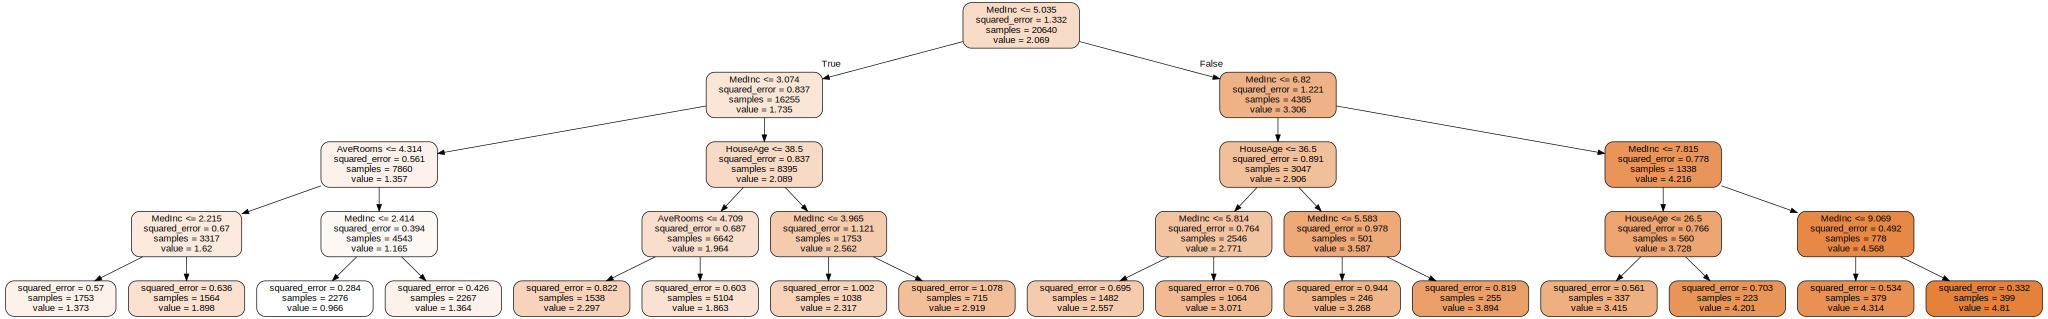

In [116]:
# Generate a plot of the decision tree
graphviz.Source(
    tree.export_graphviz(
        tree_clf_regress,
        class_names=california.target_names,
        feature_names=['MedInc','HouseAge', 'AveRooms'],
        filled=True, 
        rounded=True)
)

Let's check the graph above. If I want to predict the MedhouseVlue for the MedInc = 3, HouseAge = 40, and AveRooms = 3. Then the value of MedInc = 3.268 with mean squared error = 0.944

## Ensemble Methods
Ensemble Methods is a machine learning approach which combines different machine learning models to optimize the performance of model for better predicitons. Here I bring the *Random Forest*, *Extremely Random Forests*, and *Gradient Boosting Trees* as examples of the *Ensemple Methods*. 

### Random Forests


*Random Forests* is an ensemble method which is an ensemble of *Decision Trees*. [*Random Forests*](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) can be used in classification and regression problems. There are many parameters which can be adjusted in this model which are:

* n_estimators: int: The number of trees in the forest.

* criterion{“gini”, “entropy”}, default=”gini”: This measures the quality of splitting the branches. The quality can be evaluated based on "entropy" or "gini".

* max_depth: int, default=None: This defines the maximum depth of the tree.

* min_samples_splitint or float, default=2: The minimum number of samples required to split an internal node:

        
* min_samples_leafint or float, default=1: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

To know more about the hyperparameters please click on the link:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Extremely Random Forests


It is discussed in the [sklearn webpage](https://scikit-learn.org/stable/modules/ensemble.html) which in extremely randomized trees randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. The [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) is used to categorical data and the [ExtraTreesRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor) is used to fit numerical data. 

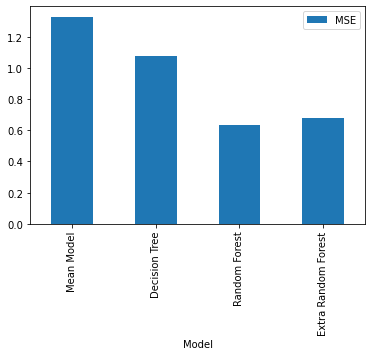

In [107]:
# Train random forests with default parameters.  Can you do better?
from sklearn import model_selection, ensemble
import pandas as pd

cv = model_selection.ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
def compute_error(clf, x, y):
    return - model_selection.cross_val_score(clf, x, y, cv=cv, scoring='neg_mean_squared_error').mean()

tree_reg = tree.DecisionTreeRegressor()
extra_reg = ensemble.ExtraTreesRegressor(n_estimators=10)
forest_reg = ensemble.RandomForestRegressor(n_estimators=10)

model_performance = pd.DataFrame([
    ("Mean Model", y.var()),
    ("Decision Tree", compute_error(tree_reg, x, y.ravel())),
    ("Random Forest", compute_error(forest_reg, x, y.ravel())),
    ("Extra Random Forest", compute_error(extra_reg, x, y.ravel())),
], columns=["Model", "MSE"])
model_performance.plot(x="Model", y="MSE", kind="bar");

### Gradient Boosting Trees
The [Gradient Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) use an ensemble of decision trees which and it is used in prediccting lables such as categorical and numerical data. Here I present the *GradientBoosingRegressor* which is used on continuous data. 

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train.ravel())

sub_tree = reg.estimators_[30,0]

mse = mean_squared_error(y_test, reg_fit.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.5609


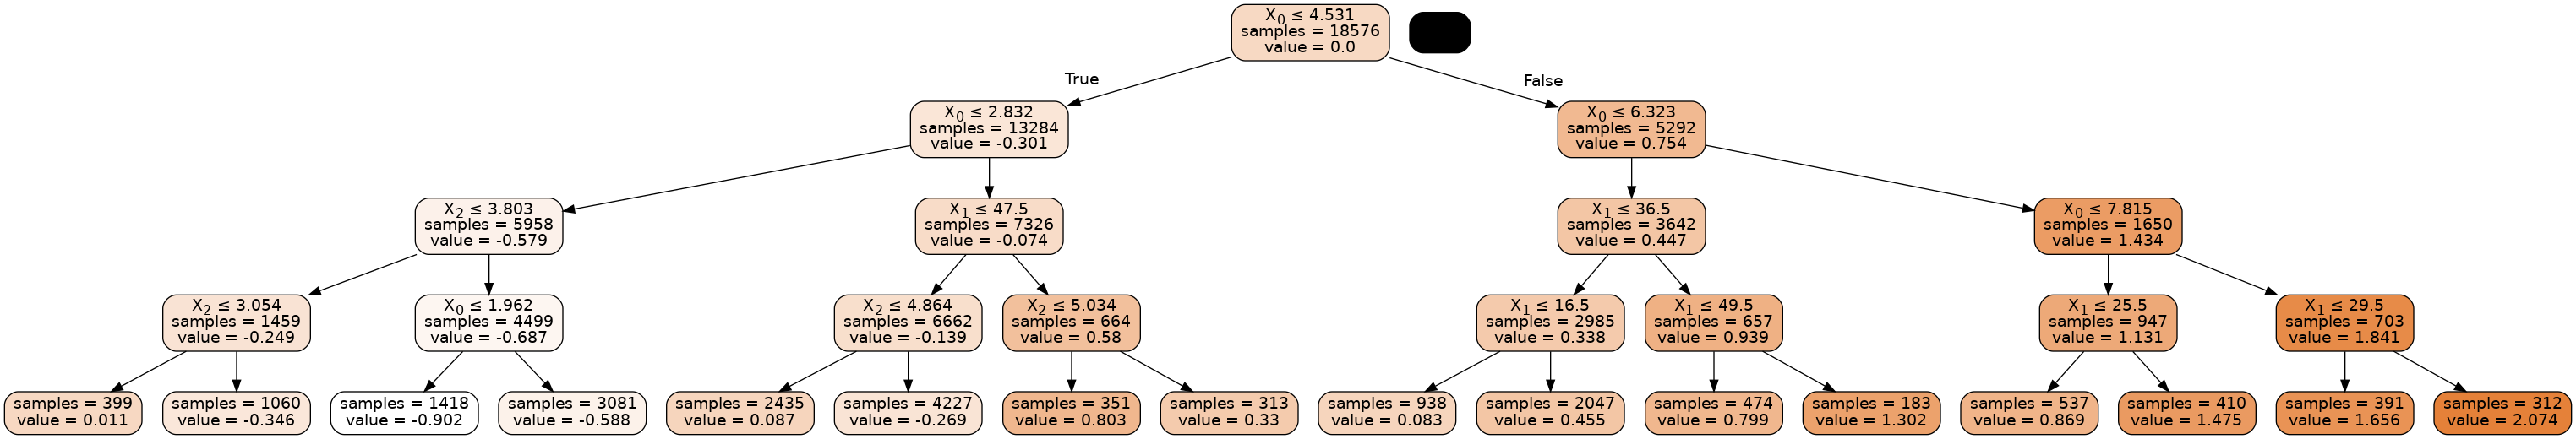

In [134]:
from pydotplus import graph_from_dot_data
from IPython.display import Image

dot_data = export_graphviz(
    sub_tree,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In the image above we are looking at the tree number 30, remember this method uses a lots of trees!